# Correlation, Risk, and Returns



$$\rho_{j,k} = \frac{\sigma_{j,k}}{\sigma_j \sigma_k}$$

Where:  
$\rho_{j,k} = $ Correlation between stocks $j$ and $k$  
$\sigma_{j,k} = $ Covariance between stocks $j$ and $k$  
$\sigma_j = $ Standard deviation (total risk) of stock $j$

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
# Rerun this line before running "plot_my_scatter()"
#%matplotlib

# Plotting more than 20 images? You may want to uncomment the code below:
# import warnings
# warnings.filterwarnings('ignore')

In [2]:
# Stocks we'll work with:
# Arlington Plc (ALTN)
# Brighton Inc (BTON)

In [3]:
def get_port_weights():
    """Returns the weights to be invested in securities belonging to a 2 asset portfolio.
    Each ensuing weight is decremented (incremented) by 0.1 for ALTN (BTON)."""
    
    # Weights of Arlington == 1 through to 0 in decrements of 0.1
    weights_altn = list(np.round(np.arange(1, -0.1, -0.1), 2))
    
    # Weights of Brighton == 0 through to 1 in increments of 0.1
    weights_bton = weights_altn[:]
    weights_bton.reverse()
    
    return weights_altn, weights_bton

<div class="alert alert-block alert-info">
<b>Reading the output of "get_port_weights()"</b>  

List 1 (at index 0) relates to weights of Arlington; List 2 (at index 1) relates to the weights of Brighton. The <i>portfolio weights</i> are each item i, j, for lists 1 and 2 respectively.

Portfolio 1 therefore invests 1.0 in Arlington and 0.0 in Brighton.  
Portfolio 2 invests 0.9 in Arlington and 0.1 in Brighton.  
.  
.  
.  
Portfolio 11 invests 0.0 in Arlington and 1.0 in Brighton
</div>

In [4]:
# Explore the weights of Arlington and Brighton in different portfolios
get_port_weights()

([1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.0],
 [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

In [5]:
def get_port_returns_risk(expected_returns, total_risks, correlation, weights):
    """Returns the portfolio returns and risks of multiple portfolio iterations.

    Args:
        expected_returns ([type: list of length 2]): [expected returns of security a and b]
        total_risks ([type: list of length 2]): [total risk of security a and b]
        correlation ([type: float]): [correlation between securities a and b]
        weights ([type: tuple of 2 lists]): [weights in security a and b for each portfolio]

    Returns:
        [type: tuple of 2 lists]: [portfolio returns and portfolio risks of different portfolio iterations]
    """
    
    port_returns = []
    port_risks = []
    for i in range(len(weights[0])):
        # Asset Weights
        w_altn = weights[0][i]
        w_bton = weights[1][i]
        
        # Asset Expected returns
        exp_r_altn = expected_returns[0]
        exp_r_bton = expected_returns[1]
        
        # Asset Risks
        risk_altn = total_risks[0]
        risk_bton = total_risks[1]
        
        # Portfolio Return
        port_ret = w_altn * exp_r_altn + w_bton * exp_r_bton
        
        # Portfolio Risk
        port_risk = np.sqrt((w_altn ** 2) * (risk_altn ** 2) \
                                + (w_bton ** 2) * (risk_bton ** 2) \
                                    + (2 * w_altn * w_bton * risk_altn * risk_bton * correlation))

        port_returns.append(port_ret)
        port_risks.append(port_risk)
    
    return port_returns, port_risks

In [6]:
def plot_my_scatter(expected_returns, total_risks, weights, correlation):

    port_returns, port_risks = get_port_returns_risk(expected_returns, total_risks, correlation, weights)
    
    plt.figure(figsize=(12, 8))
    plt.title(f"Portfolio Return vs. Portfolio Risk when ρ = {correlation}", fontsize=18)
    plt.scatter(port_risks, port_returns, color='#ffbd4a', zorder=2)
    plt.plot(port_risks, port_returns, color='#39b8eb', zorder=1, linewidth=2)
    plt.xlabel("Portfolio Risk (σ)")
    plt.ylabel("Expected Portfolio Return (E[r])")
    plt.ion()
    
    return

In [7]:
# Input
# Stock parameters
expected_r_arlington = .12
expected_r_brighton = .18
risk_arlington = .2 
risk_brighton = .3

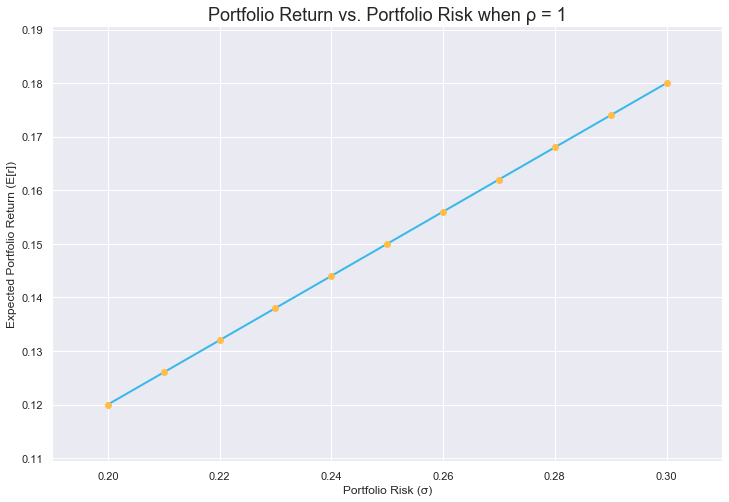

In [8]:
plot_my_scatter(expected_returns=[expected_r_arlington,
                                  expected_r_brighton],
               total_risks=[risk_arlington,
                           risk_brighton],
               weights=get_port_weights(),
               correlation=1)

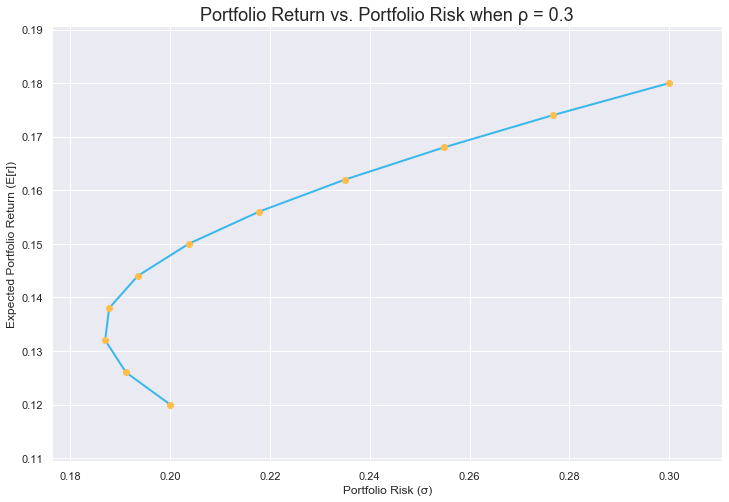

In [9]:
plot_my_scatter(expected_returns=[expected_r_arlington,
                                  expected_r_brighton],
               total_risks=[risk_arlington,
                           risk_brighton],
               weights=get_port_weights(),
               correlation=.3)

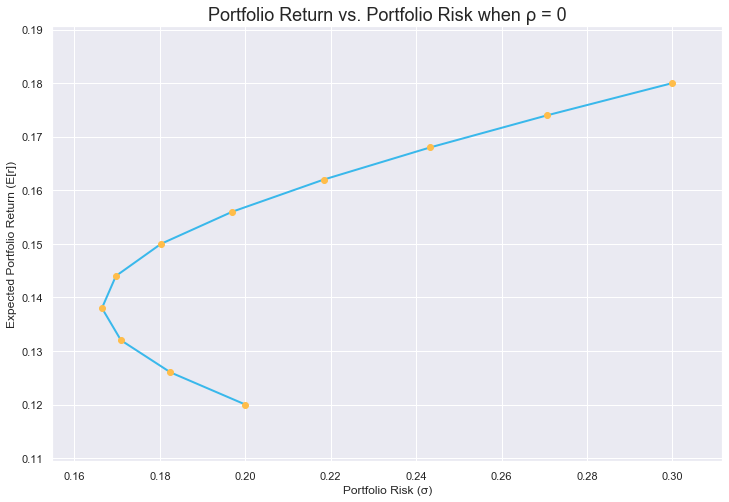

In [10]:
# Input
# Stock parameters
expected_r_arlington = .12
expected_r_brighton = .18
risk_arlington = .2 
risk_brighton = .3


plot_my_scatter(expected_returns=[expected_r_arlington,
                                  expected_r_brighton],
               total_risks=[risk_arlington,
                           risk_brighton],
               weights=get_port_weights(),
               correlation=0)

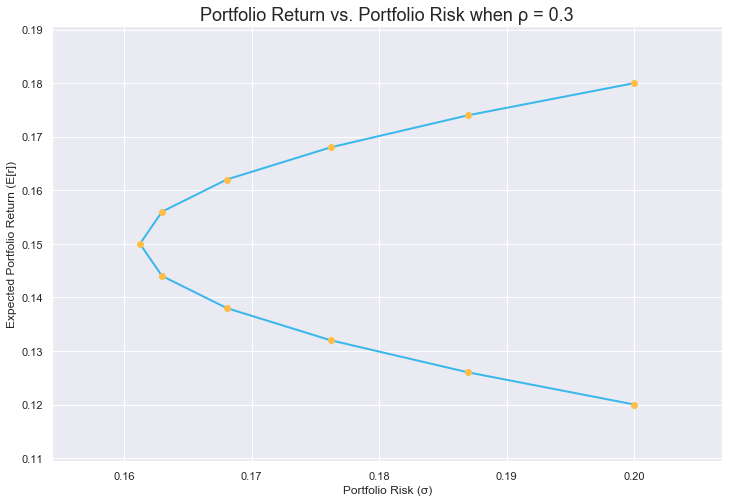

In [11]:
# Input
# Stock parameters
expected_r_arlington = .12
expected_r_brighton = .18
risk_arlington = .2 
risk_brighton = .2


plot_my_scatter(expected_returns=[expected_r_arlington,
                                  expected_r_brighton],
               total_risks=[risk_arlington,
                           risk_brighton],
               weights=get_port_weights(),
               correlation=0.3)

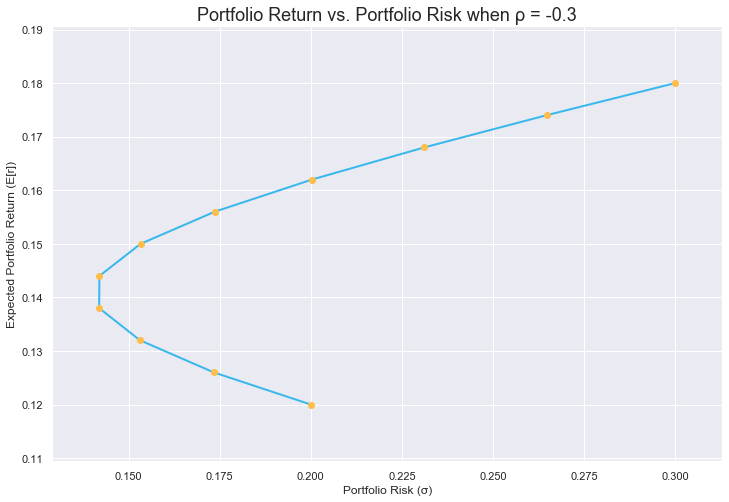

In [14]:
# Input
# Stock parameters
expected_r_arlington = .12
expected_r_brighton = .18
risk_arlington = .2 
risk_brighton = .3


plot_my_scatter(expected_returns=[expected_r_arlington,
                                  expected_r_brighton],
               total_risks=[risk_arlington,
                           risk_brighton],
               weights=get_port_weights(),
               correlation=-0.3)

##### Stocks which move with (away from) one another increase (decrease) the risk of the portfolio.
##### The risk-return trajectory of portfolios with weakly correlated, uncorrelated, or negatively correlated securities displays a somewhat “egg shape”
##### The “egg shape” displays the fact that it’s possible to earn higher returns for the same (or lower) level of risk as a result of weakly correlated, uncorrelated, or negatively correlated stocks.